In [28]:
!pip install scikit-plot
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
# read the dataset
data = pd.read_csv('online_shoppers_intention.csv')

In [29]:
missing = data.isnull().sum()
print(missing)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [30]:
data.fillna(0, inplace = True)

In [31]:
x = data.iloc[:, [5, 6]].values
x.shape

(12330, 2)

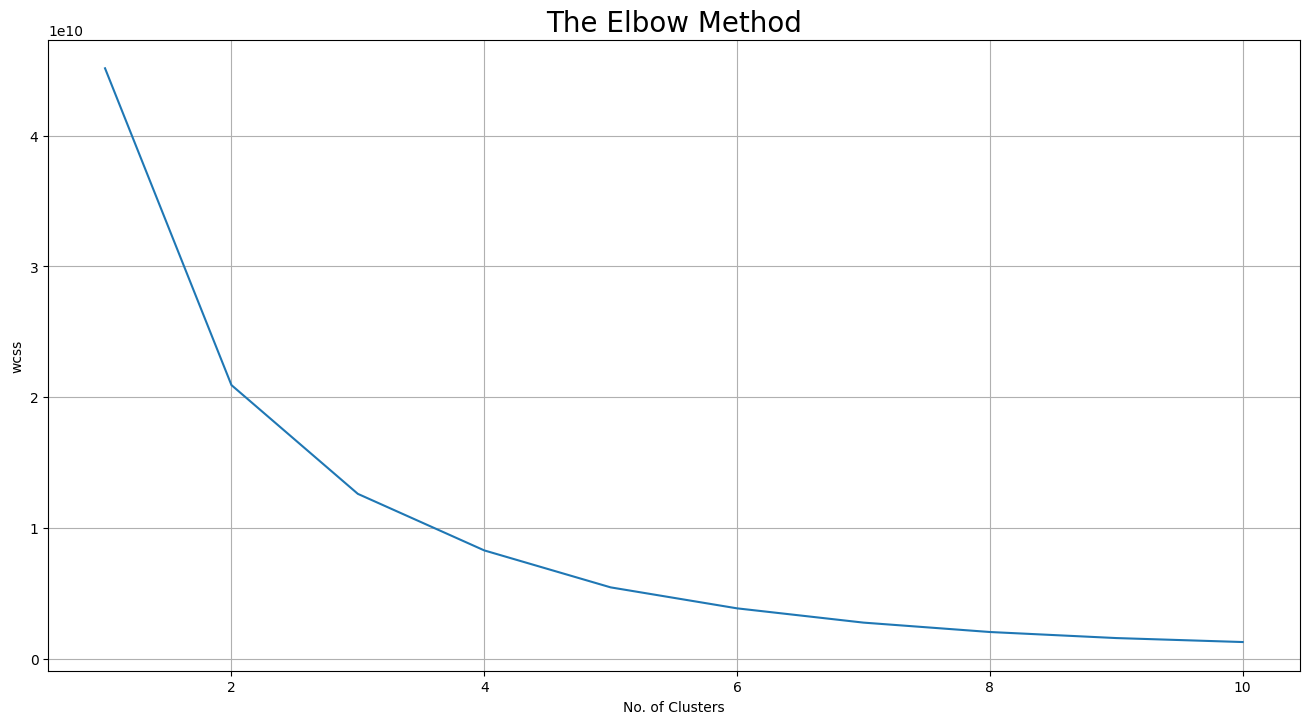

In [32]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'lloyd',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

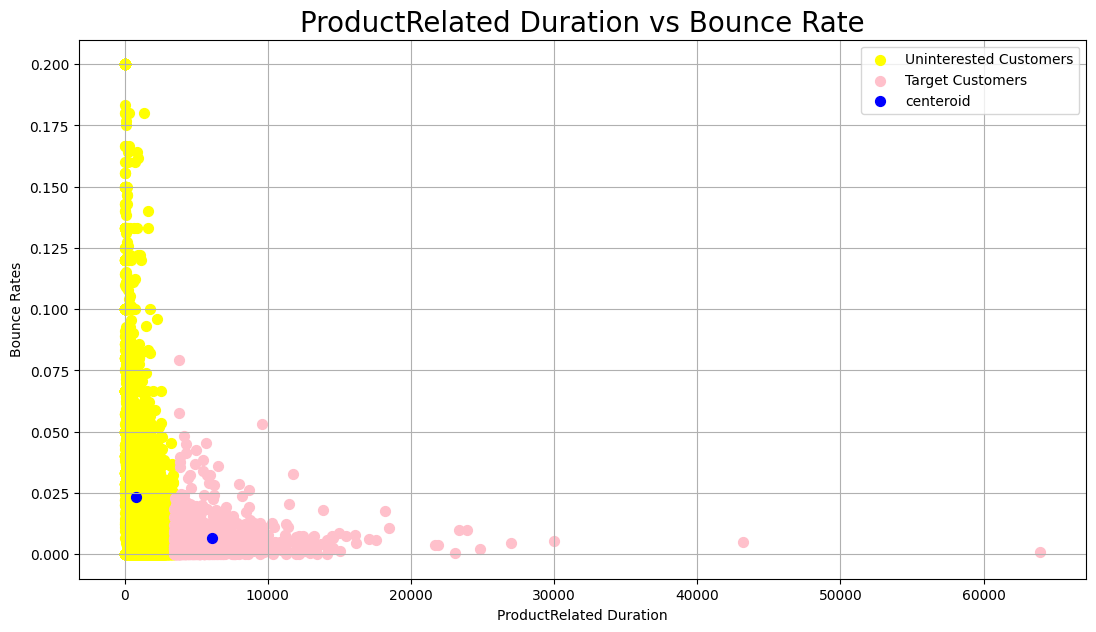

In [33]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# get predicted cluster index for each sample: 0, 1, 2
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'yellow', label = 'Uninterested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('ProductRelated Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

Adjusted rand index: 
0.08359442469281096
Confusion matrix:


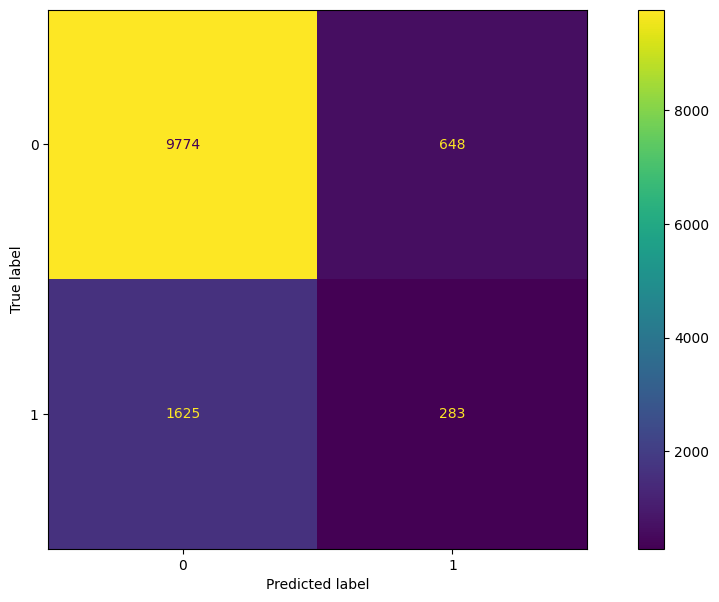

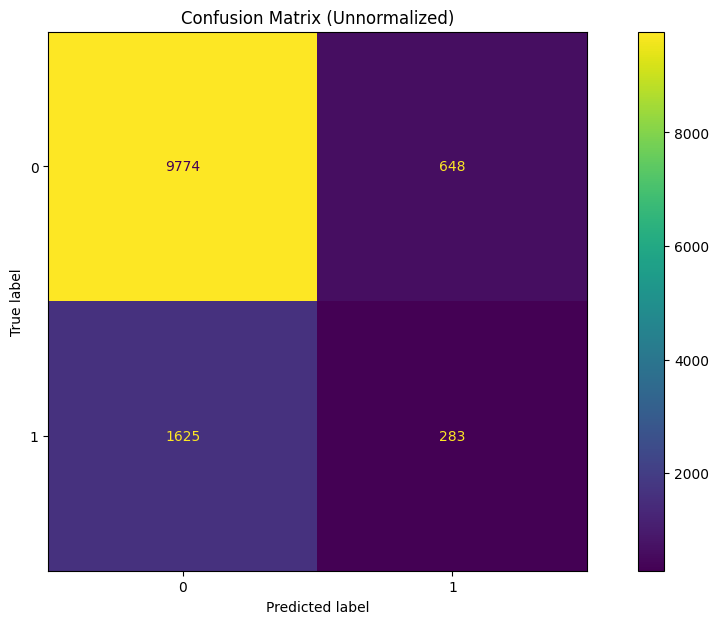

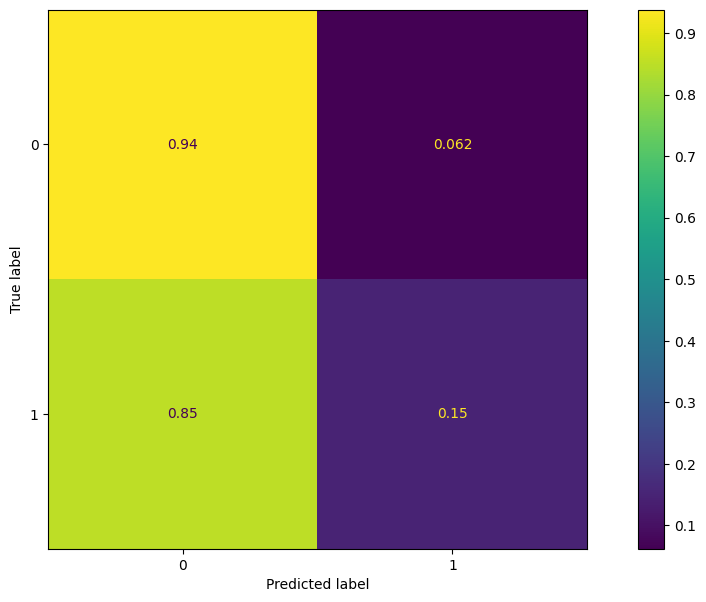

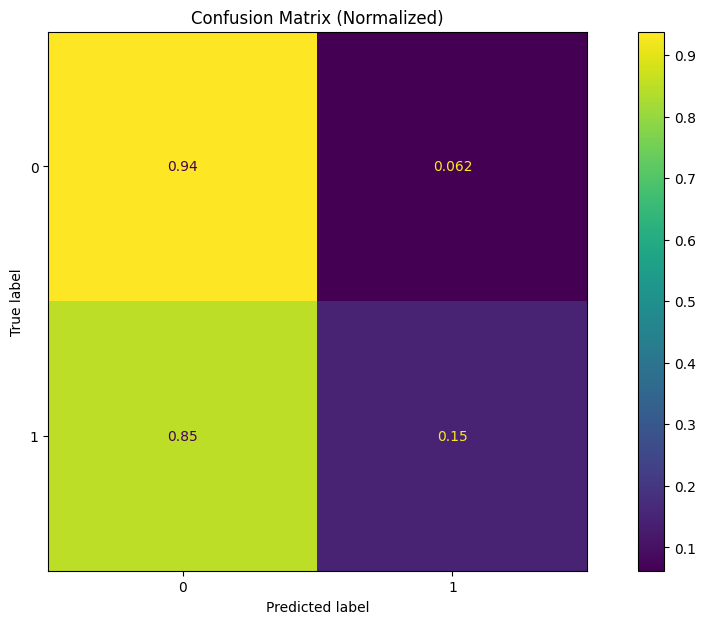

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

le = LabelEncoder()
labels_true = le.fit_transform(data['Revenue'])

# Initialize and fit KMeans to get y_means
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0, algorithm = 'lloyd')
y_means = km.fit_predict(x)

# get predicted clustering result label
labels_pred = y_means

from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print("Adjusted rand index: ")
print(score)

print("Confusion matrix:")

# Plot unnormalized confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(labels_true, labels_pred, normalize=None)
disp.plot()
plt.title('Confusion Matrix (Unnormalized)')
plt.show()

# Plot normalized confusion matrix
disp_norm = ConfusionMatrixDisplay.from_predictions(labels_true, labels_pred, normalize='true')
disp_norm.plot()
plt.title('Confusion Matrix (Normalized)')
plt.show()